<a href="https://colab.research.google.com/github/SRezaA102/MachineLearningTask/blob/main/Minggu14_UAS/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS UAS
*   NAMA = Syahrul Reza Ananda
*   NIM  = 1103210113
*   Model = CNN
*   Dataset = RPS



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import os

%matplotlib inline

In [2]:
src_dir = '/content/drive/MyDrive/Machine Learning/Minggu 14_UAS/rps-cv-images'
paper_dir = os.path.join(src_dir,'paper')
rock_dir = os.path.join(src_dir,'rock')
scissors_dir = os.path.join(src_dir,'scissors')

In [3]:
print('paper : ', len(os.listdir(paper_dir)))
print('rock : ', len(os.listdir(rock_dir)))
print('scissors : ', len(os.listdir(scissors_dir)))


paper :  712
rock :  726
scissors :  750


In [4]:
generator = ImageDataGenerator(validation_split=0.4, rescale=1/255, shear_range=0.2, zoom_range=0.2, rotation_range=20, fill_mode='nearest')
train_data = generator.flow_from_directory(src_dir, batch_size=32, target_size=(150,150), subset='training')
val_data = generator.flow_from_directory(src_dir, batch_size=32,  target_size=(150,150), subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **Membuat Model**

---



In [5]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

# **Training Model**

---



In [7]:
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.90):
            print("\nReached %2.2f%% accuracy, training has been stop" %(logs.get('accuracy')*100))
            self.model.stop_training = True
callbacks = Callbacks()

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [9]:
historyModel = model.fit(
    train_data,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = val_data,
    validation_steps = 5,
    verbose = 2,
    callbacks = [callbacks])

Epoch 1/20
25/25 - 396s - loss: 1.2522 - accuracy: 0.3442 - val_loss: 1.0929 - val_accuracy: 0.3875 - 396s/epoch - 16s/step
Epoch 2/20
25/25 - 150s - loss: 1.0258 - accuracy: 0.4740 - val_loss: 0.8997 - val_accuracy: 0.6000 - 150s/epoch - 6s/step
Epoch 3/20
25/25 - 100s - loss: 0.8975 - accuracy: 0.6247 - val_loss: 0.8788 - val_accuracy: 0.7563 - 100s/epoch - 4s/step
Epoch 4/20
25/25 - 89s - loss: 0.7498 - accuracy: 0.7075 - val_loss: 0.6981 - val_accuracy: 0.8438 - 89s/epoch - 4s/step
Epoch 5/20
25/25 - 90s - loss: 0.5263 - accuracy: 0.7975 - val_loss: 0.3688 - val_accuracy: 0.8938 - 90s/epoch - 4s/step
Epoch 6/20
25/25 - 68s - loss: 0.3449 - accuracy: 0.8779 - val_loss: 0.2417 - val_accuracy: 0.9062 - 68s/epoch - 3s/step
Epoch 7/20

Reached 91.17% accuracy, training has been stop
25/25 - 68s - loss: 0.2676 - accuracy: 0.9117 - val_loss: 0.1958 - val_accuracy: 0.9250 - 68s/epoch - 3s/step


# **Evaluasi Model**

---



In [10]:
# Evaluasi model
evaluation_results = model.evaluate(val_data)
print("Loss on validation set:", evaluation_results[0])
print("Accuracy on validation set:", evaluation_results[1])


28/28 [==============================] - 66s 2s/step - loss: 0.2113 - accuracy: 0.9348
Loss on validation set: 0.2112959772348404
Accuracy on validation set: 0.9347826242446899


# **Test Model**

---



1/1 [==============================] - 0s 31ms/step


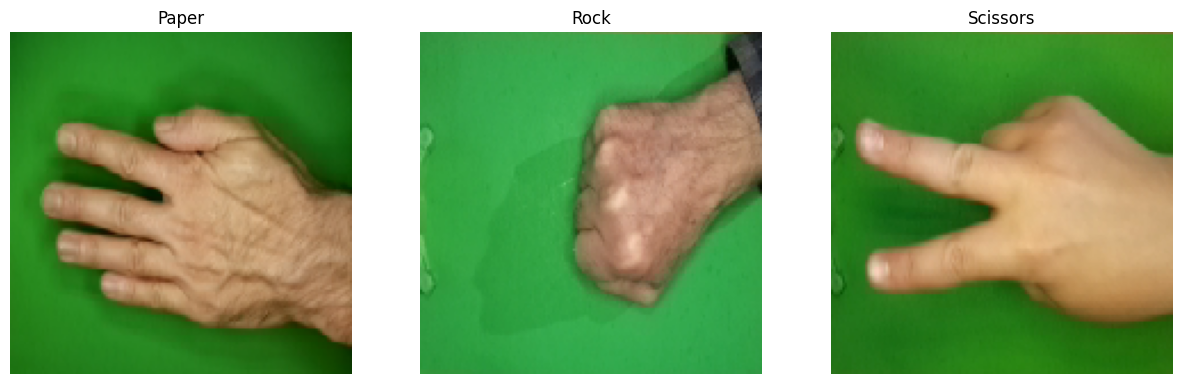

In [19]:
from tensorflow.keras.preprocessing import image

# Menginisialisasi direktori dan sub-direktori
base_dir = '/content/drive/MyDrive/Machine Learning/Minggu 14_UAS/rps-cv-images'
sub_dirs = ['rock', 'paper', 'scissors']
file_names = ['0Og76sl5CJhbxWWx.png', '0NDYNEoDui7o64gU.png', '0ePX1wuCc3et7leL.png']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, file_name in enumerate(file_names):
    # Mencari file di setiap sub-direktori
    for sub_dir in sub_dirs:
        file_path = os.path.join(base_dir, sub_dir, file_name)
        if os.path.exists(file_path):
            uploaded = file_path
            break
    else:
        raise FileNotFoundError(f"{file_name} not found in any of the subdirectories")

    img = image.load_img(uploaded, target_size=(150, 150))

    # Menampilkan gambar
    axes[i].imshow(img)
    axes[i].axis('off')  # Menyembunyikan axis

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    # Prediksi model
    classes = model.predict(images, batch_size=10)
    if classes[0][0] == 1:
        prediction = 'Paper'
    elif classes[0][1] == 1:
        prediction = 'Rock'
    else:
        prediction = 'Scissors'

    # Menambahkan judul ke subplot
    axes[i].set_title(prediction)

# Menampilkan gambar-gambar yang telah diatur
plt.show()
